# Titanic 问题
1. [Titanic: Machine Learning from Disaster | Kaggle](https://www.kaggle.com/c/titanic)

In [137]:
%matplotlib inline
# 多行结果输出支持
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 1. 下载与载入数据

In [138]:
url = ['../datasets/Titanic/train.csv', '../datasets/Titanic/test.csv']
train_data = pd.read_csv(url[0])
test_data = pd.read_csv(url[1])

## 2. 备份数据

In [139]:
public_train_data, public_test_data = train_data, test_data

## 3. 探索性数据分析

In [140]:
public_train_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25  

In [141]:
public_train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


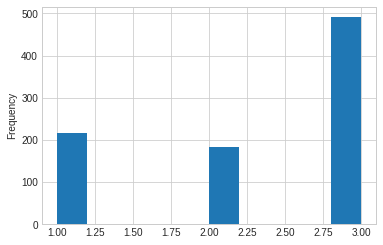

In [142]:
public_train_data['Pclass'].plot(kind='hist')

In [143]:
# 票价信息
for axis in ['Ticket', 'Fare', 'Embarked']:
    axis + ':'
    # 缺失值个数
    public_train_data[axis].isnull().sum()
    # 类别数量
    public_train_data[axis].unique().shape
    public_train_data[axis].shape

'Ticket:'

0

(681,)

(891,)

'Fare:'

0

(248,)

(891,)

'Embarked:'

2

(4,)

(891,)

In [144]:
# 标签编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Embarked 处理
for axis in ['Sex', 'Ticket', 'Fare']:
    public_train_data[axis] = le.fit_transform(public_train_data[axis])

In [145]:
public_train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,18,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,207,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,41,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,189,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,43,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,275,51,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,85,186,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,395,124,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,344,74,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,132,154,NaN,C


In [146]:
data = public_train_data['Survived'].values
target = public_train_data.drop(['Survived', 'Name'], axis=1).values

In [147]:
public_train_data['Ticket'].unique().shape
public_train_data['Ticket'].shape

(681,)

(891,)

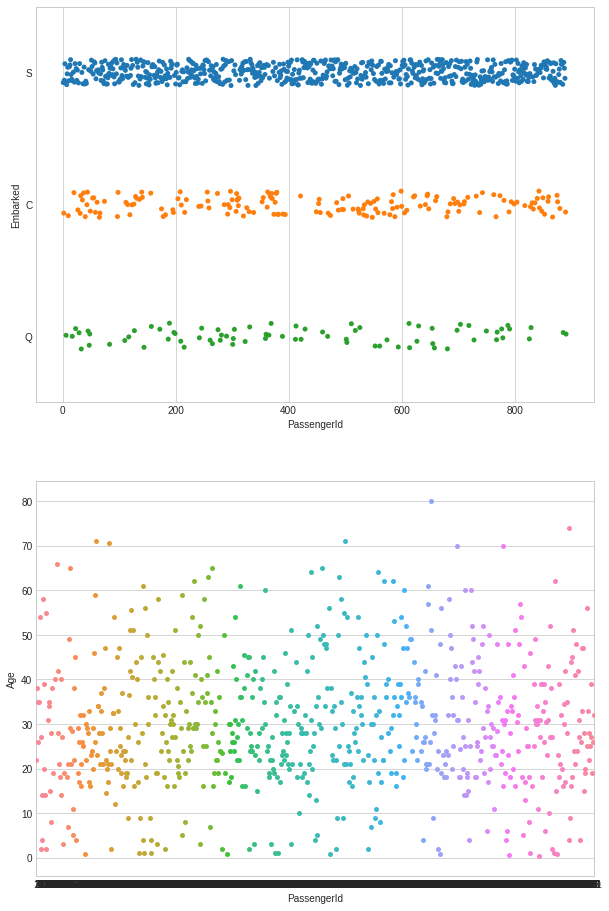

In [148]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 16))
for axi, yl in zip((ax1, ax2), ['Embarked', 'Age']):
    sns.stripplot(x='PassengerId', y=yl,
                  ax=axi, data=public_train_data, jitter=True)

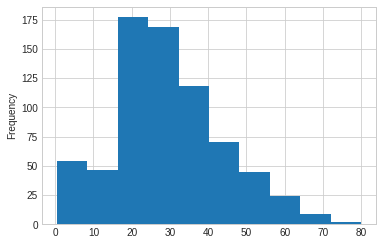

In [149]:
public_train_data['Age'].plot(kind='hist')

177

(891,)

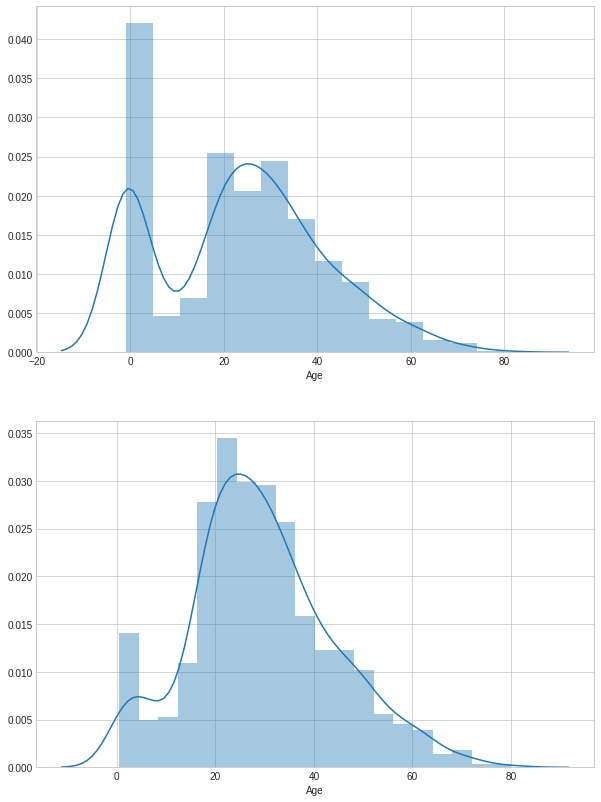

In [160]:
public_train_data['Age'].isnull().sum()
public_train_data['Age'].shape
y = public_train_data['Age'].fillna(-1)
y1 = public_train_data['Age'][np.logical_not(public_train_data['Age'].isnull())]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))
sns.distplot(y, ax=ax1)
sns.distplot(y1, ax=ax2)